In [3]:
from google.colab import files
uploaded = files.upload()

Saving layoffs_data.csv to layoffs_data.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
df = pd.read_csv("layoffs_data.csv")

In [ ]:
grouped_data = df.groupby(['Location_HQ', 'Industry'])['Laid_Off_Count'].sum().reset_index()

In [ ]:
df = df[df['Country'] == 'United States']


In [46]:
df = df.reset_index(drop=True)
df = df[df['Country'] == 'United States']

In [47]:
df_head = df.head()
print(df_head)

            Company    Location_HQ        Industry  Laid_Off_Count  \
0  Cityblock Health  New York City      Healthcare           155.0   
1        Freshworks    SF Bay Area         Support             NaN   
3         HashiCorp    SF Bay Area  Infrastructure             NaN   
4          Coherent    SF Bay Area   Manufacturing           196.0   
5            Reddit    SF Bay Area        Consumer            90.0   

   Percentage        Date                                             Source  \
0        0.12  2023-06-08  https://www.fiercehealthcare.com/providers/cit...   
1         NaN  2023-06-08  https://bwdisrupt.businessworld.in/article/Saa...   
3        0.08  2023-06-07  https://ir.hashicorp.com/news-releases/news-re...   
4         NaN  2023-06-06  https://www.mercurynews.com/2023/06/06/tech-la...   
5        0.05  2023-06-06  https://www.wsj.com/articles/reddit-is-cutting...   

   Funds_Raised     Stage           Date_Added        Country  \
0         891.0  Series D  2023-0

In [48]:
df=df.drop(['Stage'],axis=1)

In [49]:
df = df.drop(['List_of_Employees_Laid_Off', 'Date_Added', 'Date', 'Source'], axis=1)

In [64]:
missing_values = df.isna()

In [65]:
missing_counts = df.isna().sum()

In [66]:
# To drop rows with missing values
df_cleaned = df.dropna(axis=0)

# To drop columns with missing values
#df_cleaned = df.dropna(axis=1)

In [67]:
# Fill missing values with the mean of the column
df['Laid_Off_Count'] = df['Laid_Off_Count'].fillna(df['Laid_Off_Count'].mean())

# Fill missing values with the median of the column
df['Laid_Off_Count'] = df['Laid_Off_Count'].fillna(df['Laid_Off_Count'].median())

# Fill missing values with the mode of the column
df['Laid_Off_Count'] = df['Laid_Off_Count'].fillna(df['Laid_Off_Count'].mode()[0])

# Fill missing values with the mean of the column
df['Percentage'] = df['Percentage'].fillna(df['Percentage'].mean())

# Fill missing values with the median of the column
df['Percentage'] = df['Percentage'].fillna(df['Percentage'].median())

# Fill missing values with the mode of the column
df['Percentage'] = df['Percentage'].fillna(df['Percentage'].mode()[0])

# Fill missing values with the mean of the column
df['Funds_Raised'] = df['Funds_Raised'].fillna(df['Funds_Raised'].mean())

# Fill missing values with the median of the column
df['Funds_Raised'] = df['Funds_Raised'].fillna(df['Funds_Raised'].median())

# Fill missing values with the mode of the column
df['Funds_Raised'] = df['Funds_Raised'].fillna(df['Funds_Raised'].mode()[0])



In [54]:
correlation = df['Laid_Off_Count'].corr(df['Funds_Raised'])

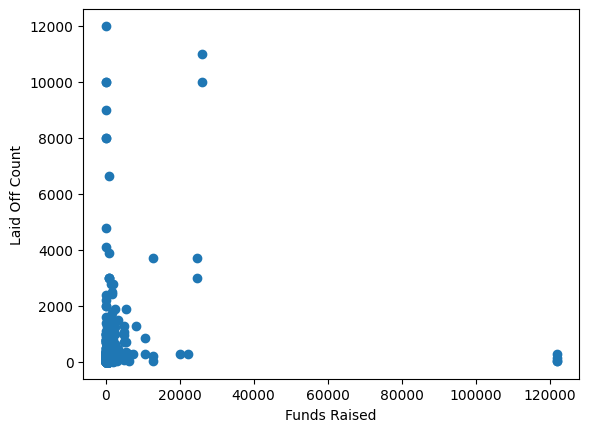

In [55]:
import matplotlib.pyplot as plt

plt.scatter(df['Funds_Raised'], df['Laid_Off_Count'])
plt.xlabel('Funds Raised')
plt.ylabel('Laid Off Count')
plt.show()

In [71]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Convert the location variable to numerical labels
df['Country'] = encoder.fit_transform(df['Country'])
# Perform one-hot encoding on the location variable
one_hot_encoded = pd.get_dummies(df['Country'], prefix='Stage')

# Concatenate the one-hot encoded variables back to the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

X = df['Funds_Raised']
y = df['Percentage']
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Percentage   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.854
Date:                Fri, 16 Jun 2023   Prob (F-statistic):             0.0277
Time:                        03:54:46   Log-Likelihood:                 348.10
No. Observations:                2688   AIC:                            -692.2
Df Residuals:                    2686   BIC:                            -680.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2632      0.004     63.385   

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded_label = df.apply(label_encoder.fit_transform)

In [ ]:
# Filter the data for rows where the country is 'United States'
#df_us = df[df['Country'] == 'United States']

# Group the filtered data by 'Location_HQ' and 'Industry' and calculate the sum of 'Laid_Off_Count'
grouped_data = df.groupby(['Location_HQ', 'Industry'])['Laid_Off_Count'].sum()

# Reset the index to convert the grouped data into a DataFrame
grouped_data = grouped_data.reset_index()

# Find the industry with the highest layoffs for each location
highest_layoffs_by_location = grouped_data.groupby('Location_HQ').apply(lambda x: x.loc[x['Laid_Off_Count'].idxmax()])

# Print the industry with the highest layoffs for each location within the United States
print("Industry with the highest layoffs for each location within the United States:")
print(highest_layoffs_by_location[['Location_HQ', 'Industry']])


Industry with the highest layoffs for each location within the United States:
                     Location_HQ        Industry
Location_HQ                                     
Albany                    Albany          Retail
Ann Arbor              Ann Arbor      Healthcare
Atlanta                  Atlanta       Marketing
Austin                    Austin        Hardware
Baltimore              Baltimore            Data
Baton Rouge          Baton Rouge        Consumer
Beijing                  Beijing        Consumer
Bend                        Bend        Consumer
Berlin                    Berlin         Finance
Birmingham            Birmingham     Real Estate
Bismarck                Bismarck       Marketing
Boise                      Boise        Hardware
Boston                    Boston      Healthcare
Boulder                  Boulder              HR
Brisbane                Brisbane      Healthcare
Burlington            Burlington         Finance
Charleston            Charleston        

In [ ]:
# Filter the data for rows where the country is 'United States'
df_us = df[df['Country'] == 'United States']

# Group the filtered data by 'Location_HQ' and 'Industry' and calculate the sum of 'Laid_Off_Count'
grouped_data = df_us.groupby(['Location_HQ', 'Industry'])['Laid_Off_Count'].sum()

# Reset the index to convert the grouped data into a DataFrame
grouped_data = grouped_data.reset_index()

# Find the industry with the highest layoffs for each location within the United States
highest_layoffs_by_location = grouped_data.groupby('Location_HQ').apply(lambda x: x.loc[x['Laid_Off_Count'].idxmax()])

# Print the industry with the highest layoffs for each location within the United States
print("Industry with the highest layoffs for each location within the United States:")
print(highest_layoffs_by_location[['Location_HQ', 'Industry']])


Industry with the highest layoffs for each location within the United States:
                     Location_HQ        Industry
Location_HQ                                     
Albany                    Albany          Retail
Ann Arbor              Ann Arbor      Healthcare
Atlanta                  Atlanta       Marketing
Austin                    Austin        Hardware
Baltimore              Baltimore            Data
Baton Rouge          Baton Rouge        Consumer
Beijing                  Beijing        Consumer
Bend                        Bend        Consumer
Berlin                    Berlin         Finance
Birmingham            Birmingham     Real Estate
Bismarck                Bismarck       Marketing
Boise                      Boise        Hardware
Boston                    Boston      Healthcare
Boulder                  Boulder              HR
Brisbane                Brisbane      Healthcare
Burlington            Burlington         Finance
Charleston            Charleston        

In [ ]:
# Group the data by 'Industry' and 'Location_HQ' and calculate the sum of 'Laid_Off_Count'
grouped_data = df.groupby(['Industry', 'Location_HQ'])['Laid_Off_Count'].sum()

# Reset the index to convert the grouped data into a DataFrame
grouped_data = grouped_data.reset_index()

# Find the industry with the highest layoffs across all locations
highest_layoffs_industry = grouped_data.groupby('Industry')['Laid_Off_Count'].sum().idxmax()

# Print the industry with the highest layoffs across all locations
print("Industry with highest layoffs across all locations:", highest_layoffs_industry)


Industry with highest layoffs across all locations: Consumer


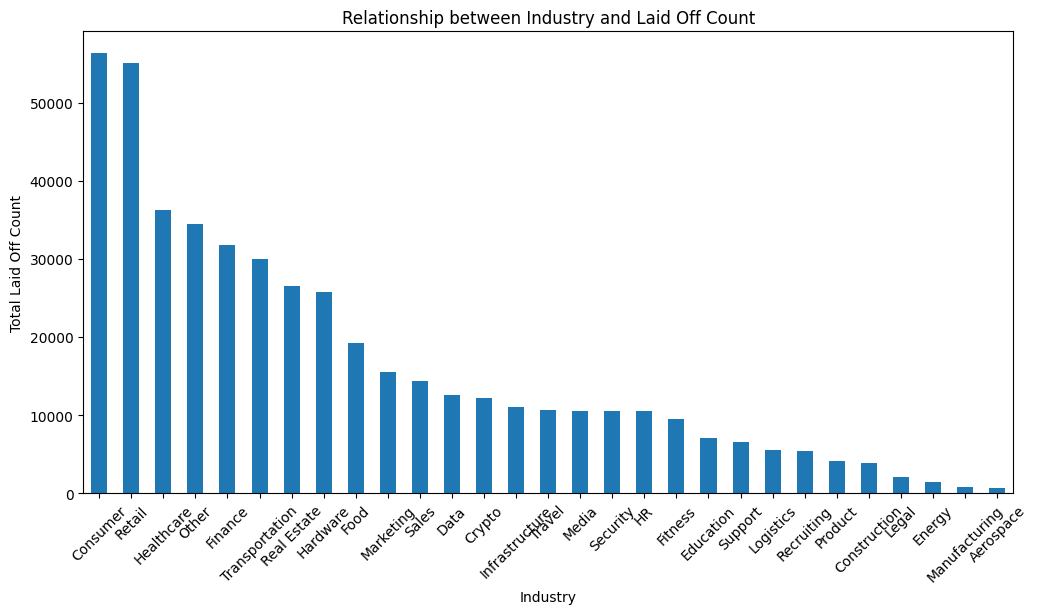

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame


# Group the data by "Industry" and calculate the sum of "Laid_Off_Count"
industry_layoffs = df.groupby('Industry')['Laid_Off_Count'].sum()

# Sort the data by the sum of layoffs in descending order
industry_layoffs = industry_layoffs.sort_values(ascending=False)

# Plot the relationship between industry and layoffs
plt.figure(figsize=(12, 6))
industry_layoffs.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Total Laid Off Count')
plt.title('Relationship between Industry and Laid Off Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the CSV file into a DataFrame
#df = pd.read_csv('your_csv_file.csv')

# Split the data into input features (X) and target variable (y)
X = df[['Industry', 'Location_HQ', 'Funds_Raised']]
y = df['Laid_Off_Count'].apply(lambda x: 1 if x > 0 else 0)  # Convert Laid_Off_Count to binary labels

# Encode categorical variables
encoder = LabelEncoder()
X['Industry'] = encoder.fit_transform(X['Industry'])
X['Location_HQ'] = encoder.fit_transform(X['Location_HQ'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a Random Forest classifier as the classification model
classifier = RandomForestClassifier()

# Train the model
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Feature Importance Analysis
feature_importances = pd.Series(classifier.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances)


Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Feature Importances:
Industry        0.0
Location_HQ     0.0
Funds_Raised    0.0
dtype: float64


<ipython-input-87-fc3f890216ce>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Industry'] = encoder.fit_transform(X['Industry'])
<ipython-input-87-fc3f890216ce>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location_HQ'] = encoder.fit_transform(X['Location_HQ'])


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the CSV file into a DataFrame
#df = pd.read_csv('layoffs_data.csv')

# Drop rows where the Country is not the United States
#df = df[df['Country'] == 'United States']

# Split the data into input features (X) and target variable (y)
X = df[['Industry', 'Location_HQ', 'Funds_Raised']]
y = df['Laid_Off_Count'].apply(lambda x: 1 if x > 0 else 0)  # Convert Laid_Off_Count to binary labels

# Encode categorical variables
encoder = LabelEncoder()
X.loc[:, 'Industry'] = encoder.fit_transform(X.loc[:, 'Industry'])
X.loc[:, 'Location_HQ'] = encoder.fit_transform(X.loc[:, 'Location_HQ'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a Random Forest classifier as the classification model
classifier = RandomForestClassifier()

# Train the model
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Feature Importance Analysis
feature_importances = pd.Series(classifier.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances)


<ipython-input-93-d8b12da78472>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Industry'] = encoder.fit_transform(X.loc[:, 'Industry'])
<ipython-input-93-d8b12da78472>:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'Industry'] = encoder.fit_transform(X.loc[:, 'Industry'])
<ipython-input-93-d8b12da78472>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

ValueError: ignored

**knn**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = df[df['Country'] == 'United States']
X = df[['Industry', 'Location_HQ', 'Funds_Raised']]
y = df['Laid_Off_Count'].apply(lambda x: 1 if x > 0 else 0) # Convert Laid_Off_Count to binary labels
encoder = LabelEncoder()
X.loc[:, 'Industry'] = encoder.fit_transform(X.loc[:, 'Industry'])
X.loc[:, 'Location_HQ'] = encoder.fit_transform(X.loc[:, 'Location_HQ'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

#Feature Importance Analysis (Not applicable for K-Nearest Neighbors)
print("Feature Importances: N/A for K-Nearest Neighbors")




Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Feature Importances: N/A for K-Nearest Neighbors


<ipython-input-90-9f8313a35035>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Industry'] = encoder.fit_transform(X.loc[:, 'Industry'])
<ipython-input-90-9f8313a35035>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'Industry'] = encoder.fit_transform(X.loc[:, 'Industry'])
<ipython-input-90-9f8313a35035>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [78]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Read the CSV file into a DataFrame
#df = pd.read_csv('layoffs_data.csv')

# Drop rows where the Country is not the United States
#df = df[df['Country'] == 'United States']

# Preprocess the data
df = df.dropna()  # Remove rows with missing values
df = df[['Funds_Raised', 'Percentage']]  # Select relevant columns


# Transform the data into a transaction format
transactions = df.groupby('Funds_Raised')['Percentage'].apply(list).values.tolist()

# Encode the transactions
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Apply association rule mining
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
association_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Print the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print the association rules
print("Association Rules:")
print(association_rules)


Frequent Itemsets:
    support                   itemsets
0  0.213855                      (0.1)
1  0.150602                     (0.15)
2  0.162651                      (0.2)
3  0.115964                     (0.25)
4  0.581325       (0.2617837157246783)
5  0.103916                      (0.3)
6  0.102410                      (1.0)
7  0.129518  (0.2617837157246783, 0.1)
8  0.114458  (0.2617837157246783, 0.2)
Association Rules:
  antecedents           consequents  antecedent support  consequent support  \
0       (0.2)  (0.2617837157246783)            0.162651            0.581325   

    support  confidence      lift  leverage  conviction  
0  0.114458    0.703704  1.210516  0.019905    1.413027  


**Causation**

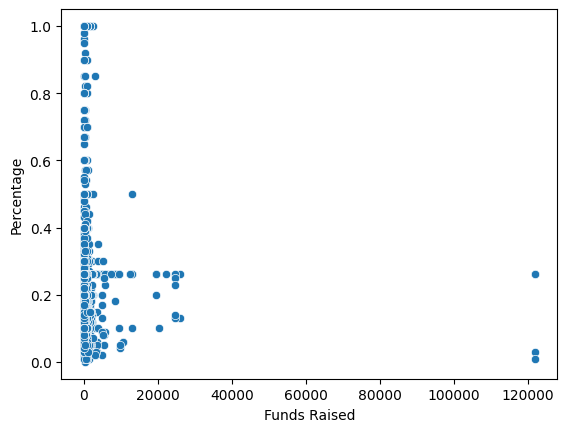

Correlation between Funds Raised and Percentage: -0.04247288809378125
                            OLS Regression Results                            
Dep. Variable:             Percentage   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.852
Date:                Fri, 16 Jun 2023   Prob (F-statistic):             0.0277
Time:                        04:16:12   Log-Likelihood:                 347.47
No. Observations:                2687   AIC:                            -690.9
Df Residuals:                    2685   BIC:                            -679.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [79]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define your research question
# Hypothesis: There is a causal relationship between the amount of funds raised and the percentage of layoffs.

# Step 2: Design a study
# Assuming you have a CSV file named 'data.csv' with columns 'Funds_Raised' and 'Percentage'

# Step 3: Identify causal mechanisms
# Load the data
#df = pd.read_csv('data.csv')

# Explore and visualize the relationship between 'Funds_Raised' and 'Percentage'
sns.scatterplot(data=df, x='Funds_Raised', y='Percentage')
plt.xlabel('Funds Raised')
plt.ylabel('Percentage')
plt.show()

# Calculate descriptive statistics
correlation = df['Funds_Raised'].corr(df['Percentage'])
print(f"Correlation between Funds Raised and Percentage: {correlation}")

# Step 4: Control for confounding variables
# Perform multiple regression to control for confounding variables
X = df['Funds_Raised']
X = sm.add_constant(X)
y = df['Percentage']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Step 5: Analyze the data
# Interpret the results and draw conclusions based on the analysis
p_value = results.pvalues['Funds_Raised']
if p_value < 0.05:
    print("There is a significant relationship between Funds Raised and Percentage.")
else:
    print("There is no significant relationship between Funds Raised and Percentage.")
